# BIRDS CLASSIFICATION

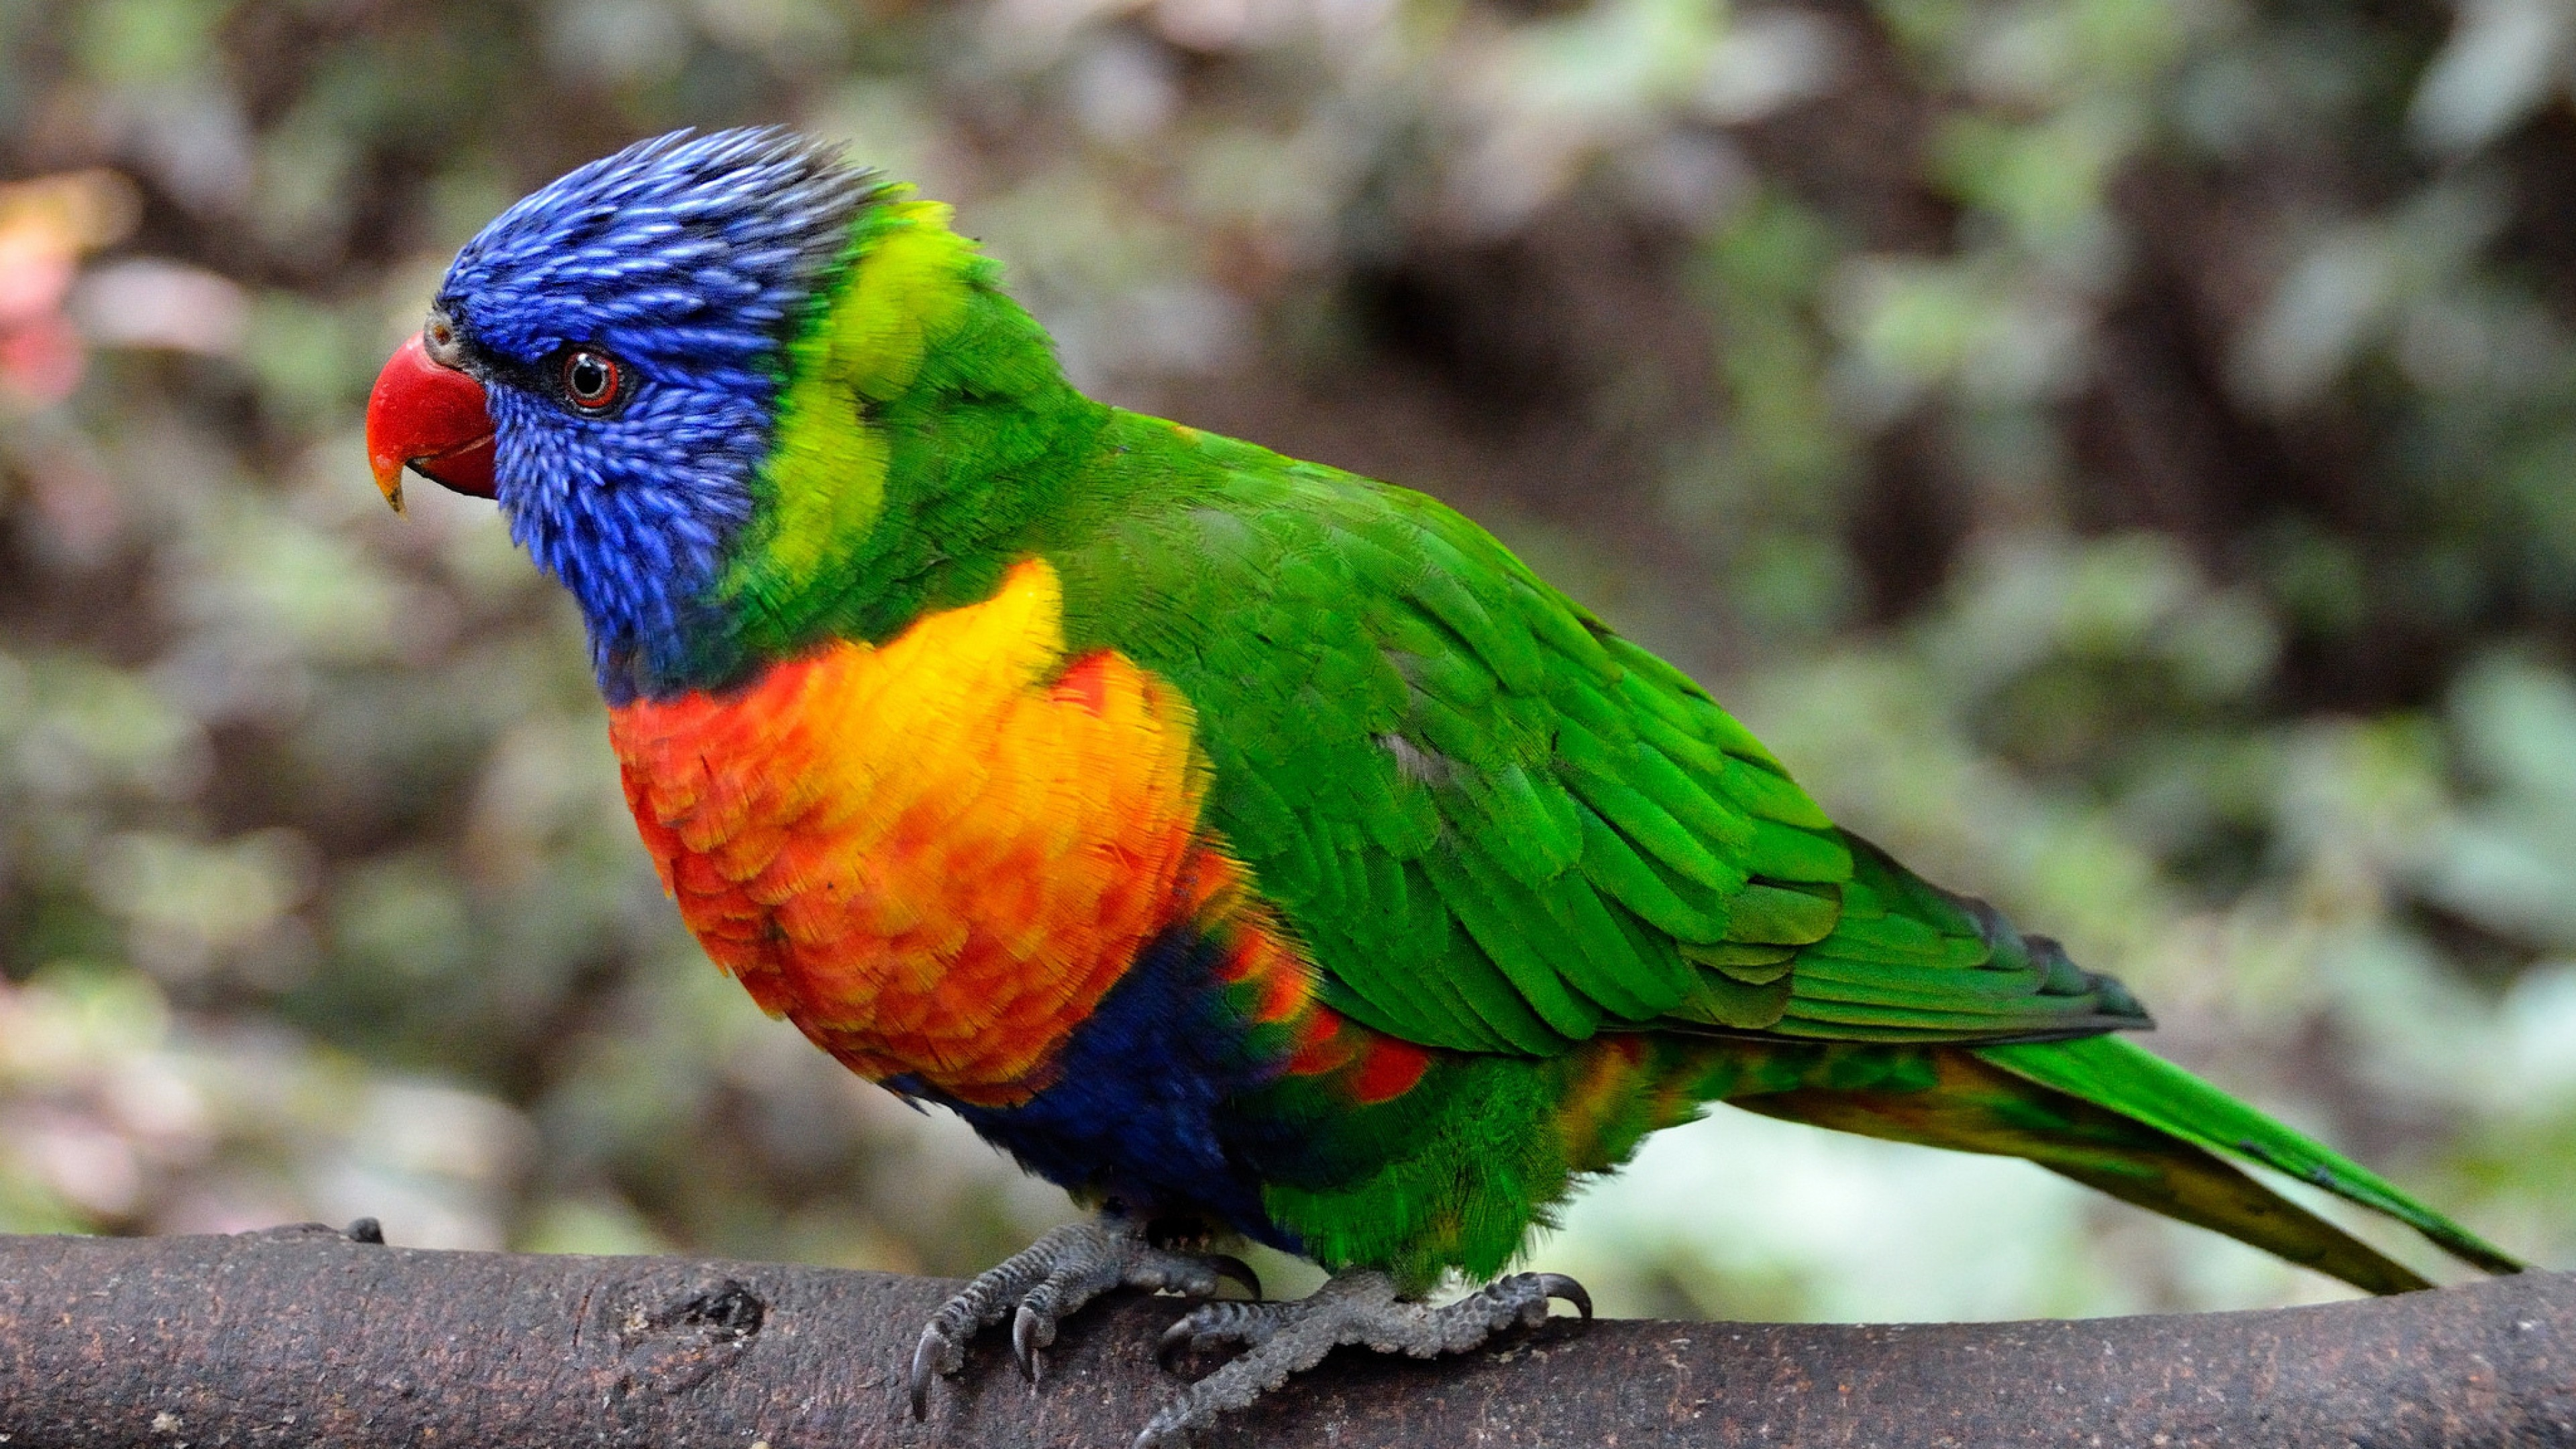



#### In this notebook I will attempt to classify birds using random forest, focusing on how pre processing techniques can effect accuracy.


### Importing Header Files

In [1]:
import pandas as pd                     #For Data Manipulation
import numpy as np                      #For Numeric Operations

#For Data Visulisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For Ignoring Warnings 
import warnings
warnings.filterwarnings('ignore')

#For ROC_Curve,AUC & Accuracy_Score & Confusion Matrix
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix

#For Classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

#For Label Encoding,Scaling & For Setting the Output Value to Binary Form
from sklearn.preprocessing import label_binarize, StandardScaler,LabelEncoder    
from sklearn.model_selection import train_test_split      #For Training & Testing Data Splitting

s#The function takes an iterable as the argument and it is used to print all the elements in the passed iterable one by one
from itertools import cycle         
from imblearn.over_sampling import RandomOverSampler,SMOTE      #For Imbalance Checking

### Importing Dataset & Performing Essential Steps

In [2]:
df=pd.read_csv('bird.csv')
df

id   huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw  \
0      0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84   
1      1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01   
2      2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34   
3      3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41   
4      4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13   
..   ...    ...   ...    ...    ...    ...   ...    ...   ...    ...   ...   
415  415  17.96  1.63  19.25   1.33  18.36  1.54  31.25  1.33  21.99  1.15   
416  416  19.21  1.64  20.76   1.49  19.24  1.45  33.21  1.28  23.60  1.15   
417  417  18.79  1.63  19.83   1.53  20.96  1.43  34.45  1.41  22.86  1.21   
418  418  20.38  1.78  22.53   1.50  21.35  1.48  36.09  1.53  25.98  1.24   
419  419  17.89  1.44  19.26   1.10  17.62  1.34  29.81  1.24  21.69  1.05   

    type  
0     SW  
1     SW  
2     SW  
3     SW  
4     SW  
..   ...  
415   SO  
416   SO  
417   SO  
418   SO  
419   SO  

[420 rows x 12 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      420 non-null    int64  
 1   huml    419 non-null    float64
 2   humw    419 non-null    float64
 3   ulnal   417 non-null    float64
 4   ulnaw   418 non-null    float64
 5   feml    418 non-null    float64
 6   femw    419 non-null    float64
 7   tibl    418 non-null    float64
 8   tibw    419 non-null    float64
 9   tarl    419 non-null    float64
 10  tarw    419 non-null    float64
 11  type    420 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 39.5+ KB


### Exploratory Data Analysis

In [4]:
df.isnull().mean()*100

id       0.000000
huml     0.238095
humw     0.238095
ulnal    0.714286
ulnaw    0.476190
feml     0.476190
femw     0.238095
tibl     0.476190
tibw     0.238095
tarl     0.238095
tarw     0.238095
type     0.000000
dtype: float64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().mean()*100

id       0.0
huml     0.0
humw     0.0
ulnal    0.0
ulnaw    0.0
feml     0.0
femw     0.0
tibl     0.0
tibw     0.0
tarl     0.0
tarw     0.0
type     0.0
dtype: float64

In [7]:
df.duplicated().sum()

0

In [9]:
df.describe().T

count        mean         std    min     25%     50%     75%     max
id     413.0  207.987893  121.199236   0.00  103.00  209.00  312.00  419.00
huml   413.0   64.874867   54.056078   9.85   25.36   44.18   90.49  420.00
humw   413.0    4.381235    2.861460   1.14    2.20    3.50    5.82   17.84
ulnal  413.0   69.197409   58.929490  14.09   28.16   43.71   97.52  422.00
ulnaw  413.0    3.606538    2.190150   1.00    1.87    2.96    4.77   12.00
feml   413.0   36.822446   19.899356  11.83   21.35   31.09   47.09  117.07
femw   413.0    3.221768    2.021169   0.93    1.72    2.52    4.11   11.64
tibl   413.0   64.615642   37.977929   5.50   36.35   51.88   82.87  240.00
tibw   413.0    3.182324    2.084124   0.87    1.56    2.49    4.25   11.03
tarl   413.0   39.309806   23.272704   7.77   23.05   31.74   50.44  175.00
tarw   413.0    2.944891    2.194744   0.66    1.43    2.24    3.52   14.09

In [10]:
df.shape

(413, 12)

## Univariate Analysis

### Histplot

#### A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

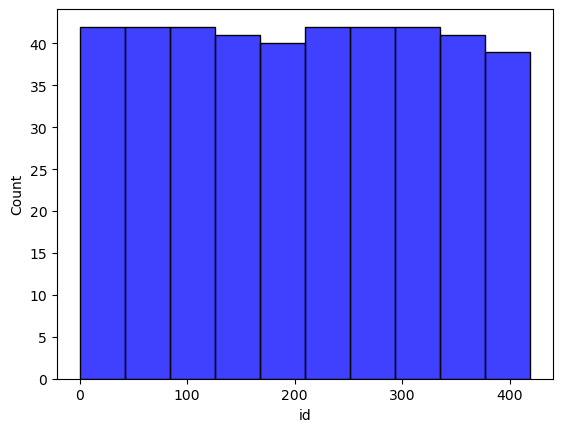

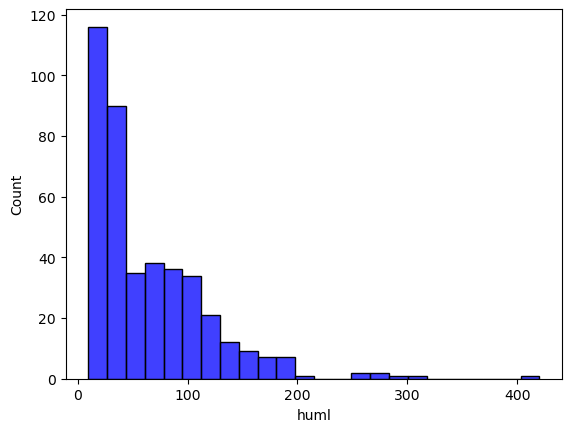

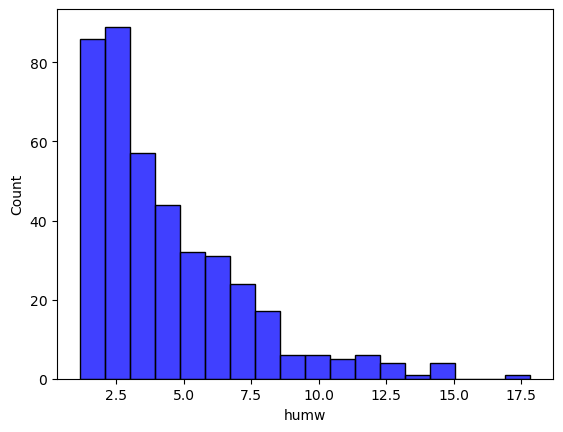

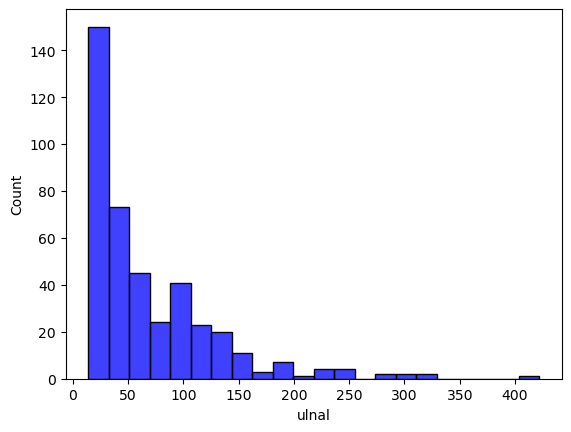

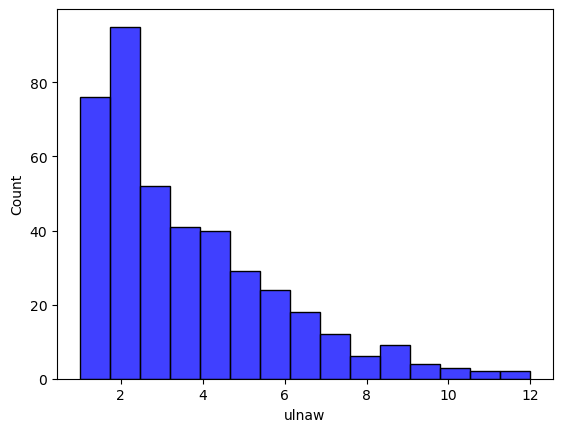

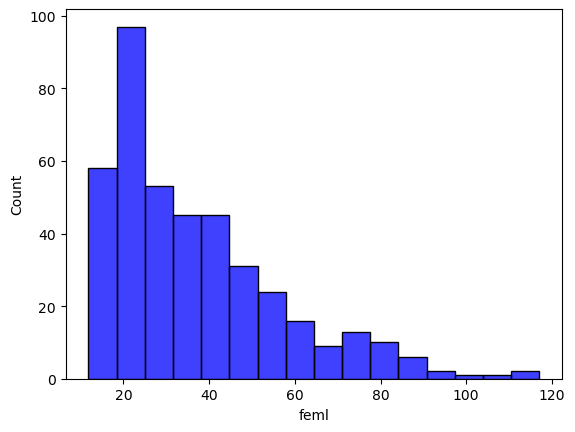

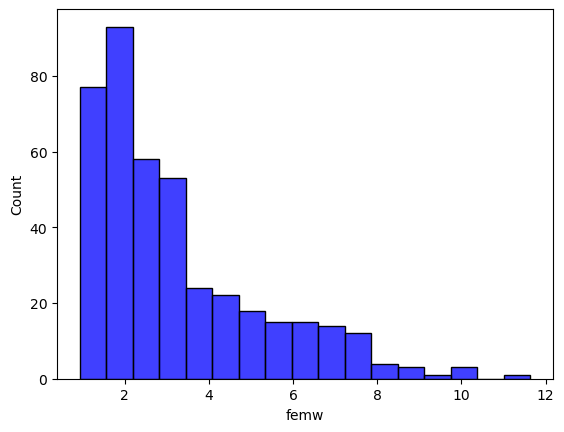

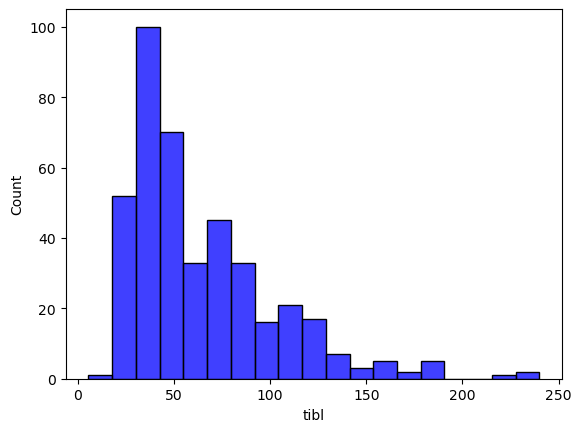

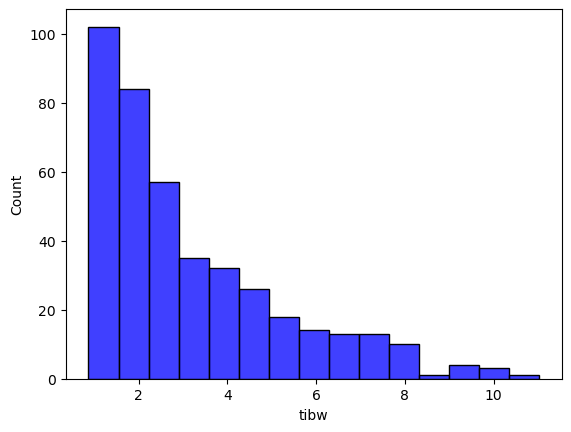

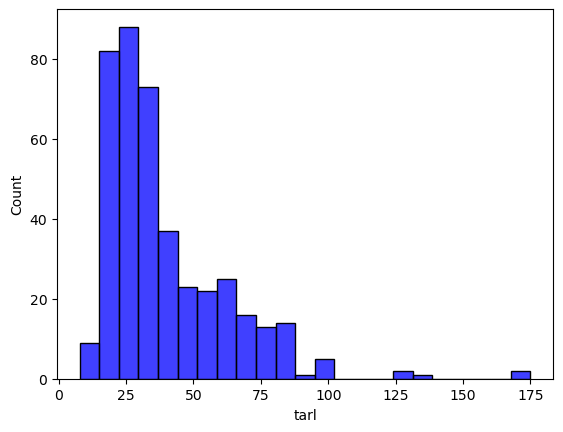

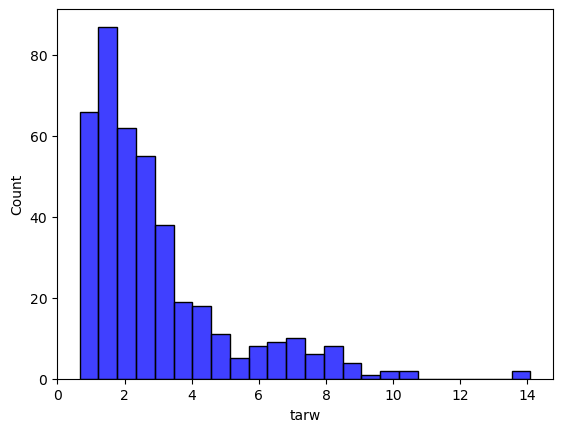

In [11]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.histplot(x=df[i],color='blue')
        plt.show()

### KDEPlot

#### A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

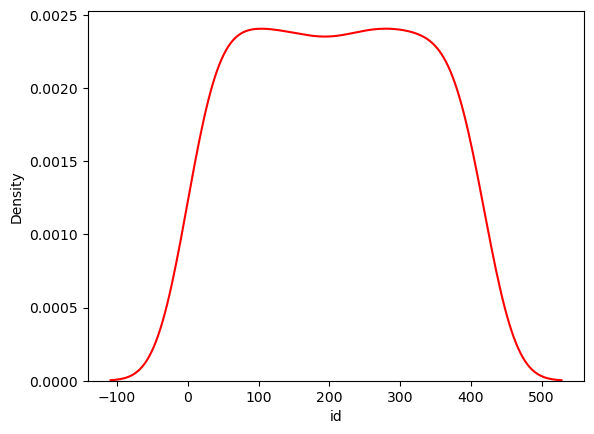

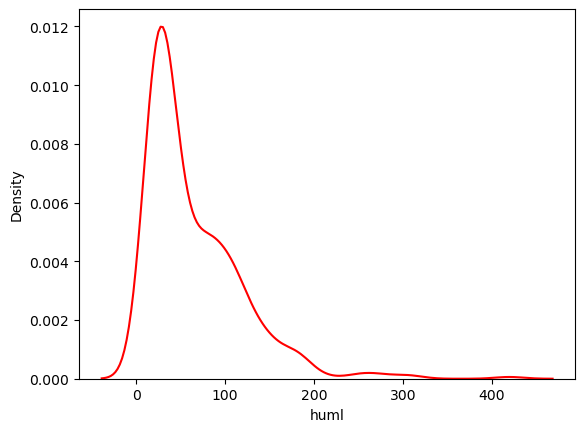

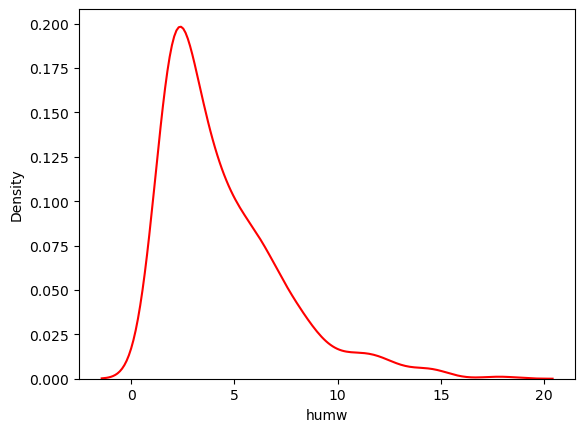

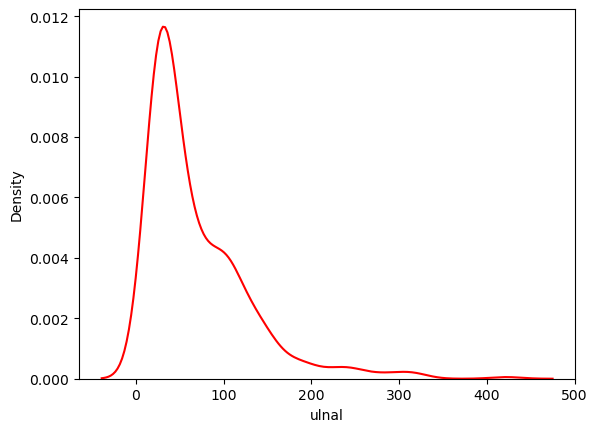

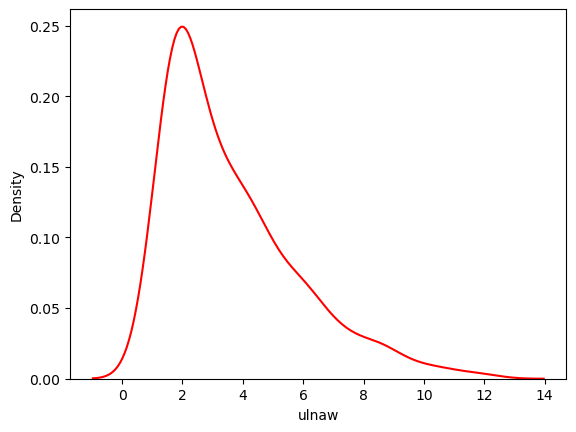

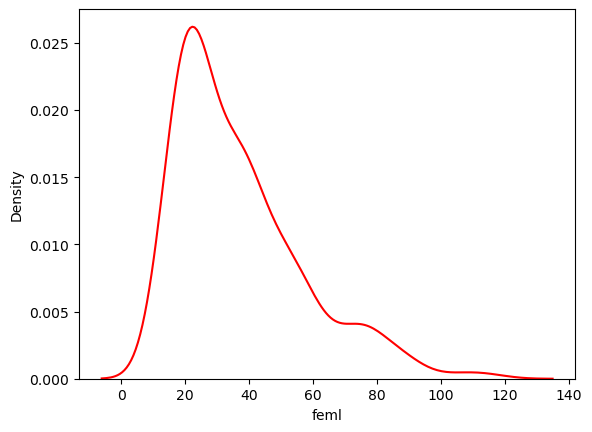

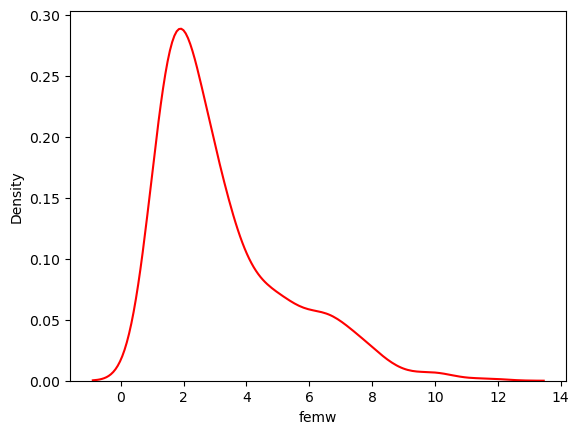

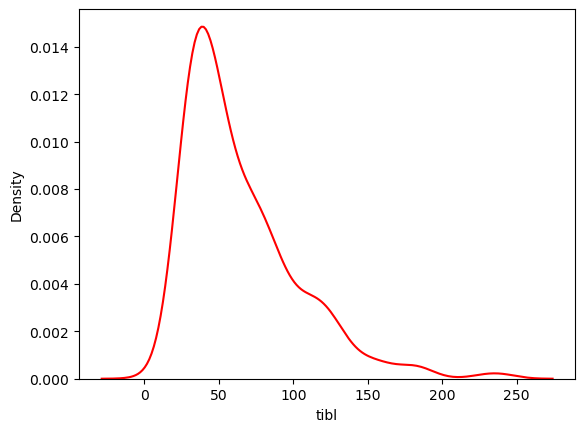

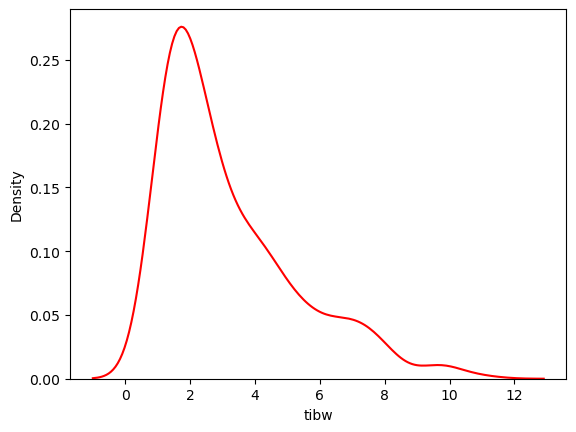

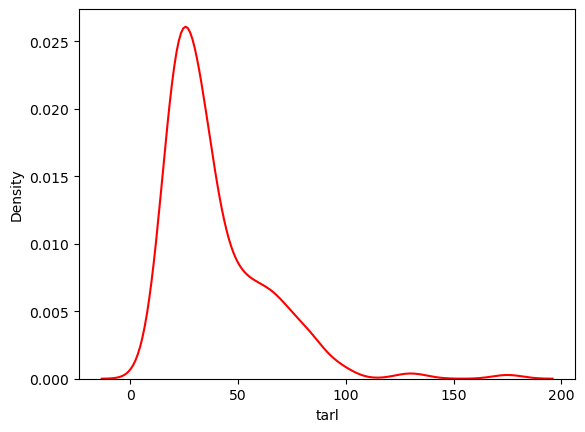

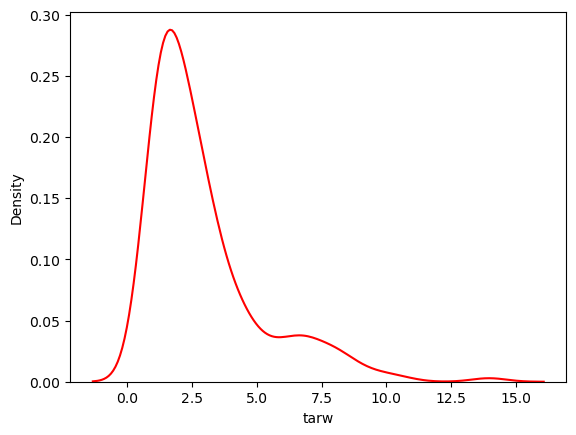

In [12]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.kdeplot(x=df[i],color='red')
        plt.show()

### Stripplot

#### A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

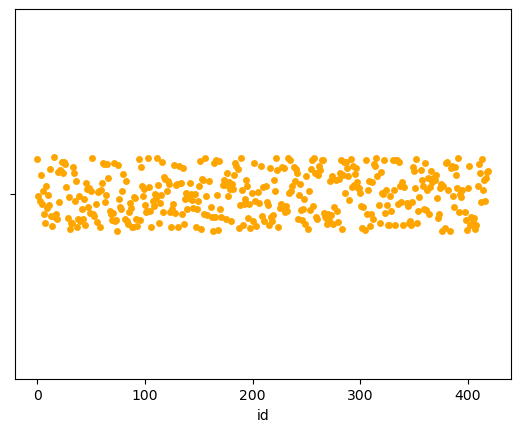

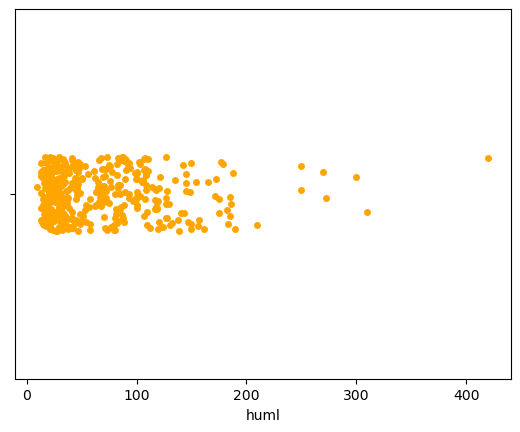

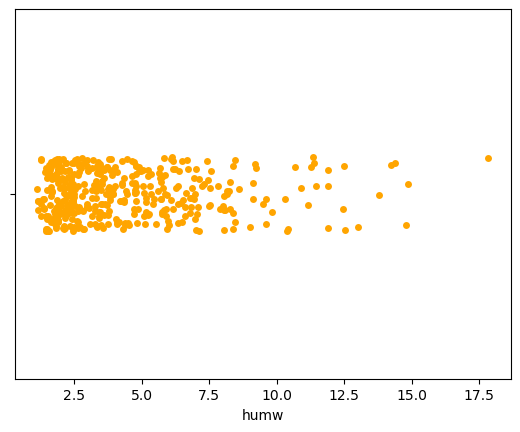

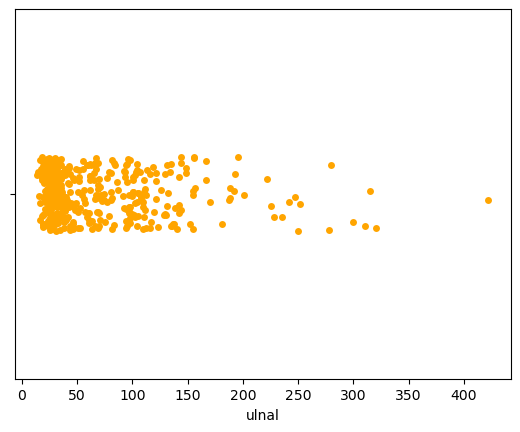

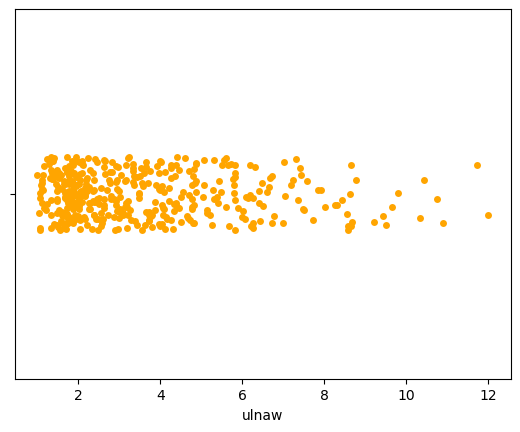

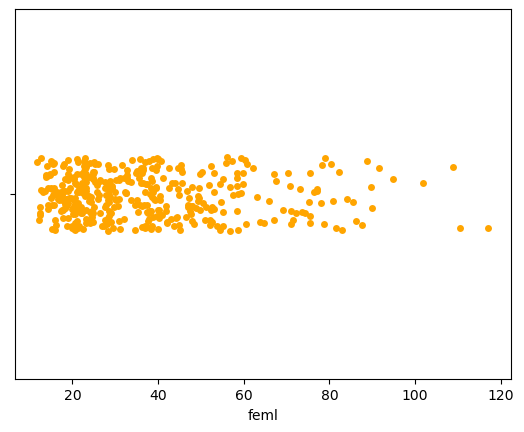

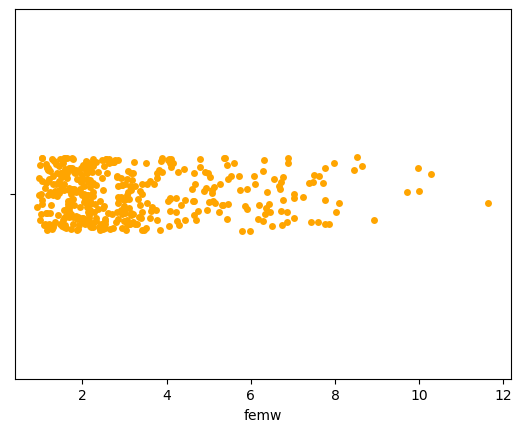

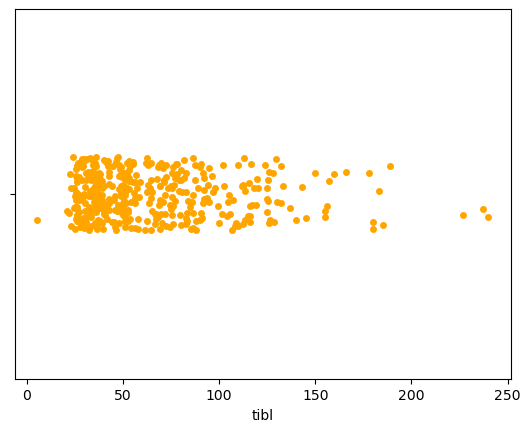

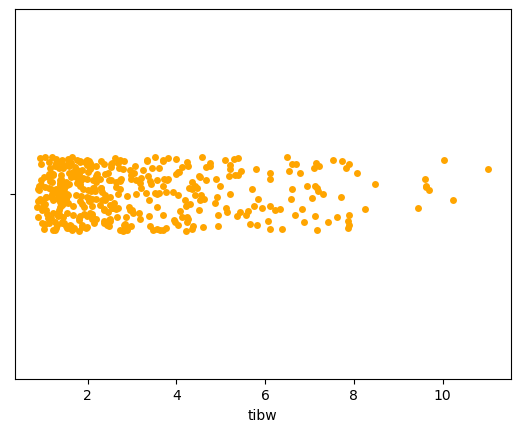

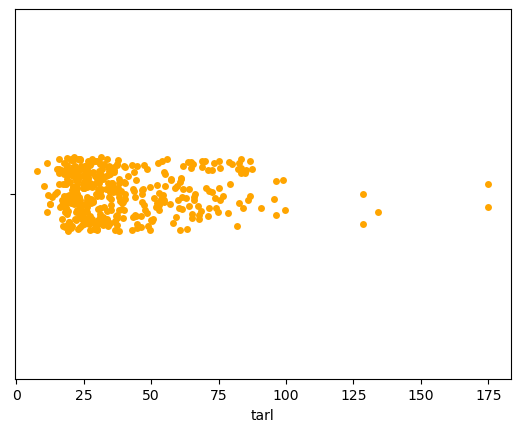

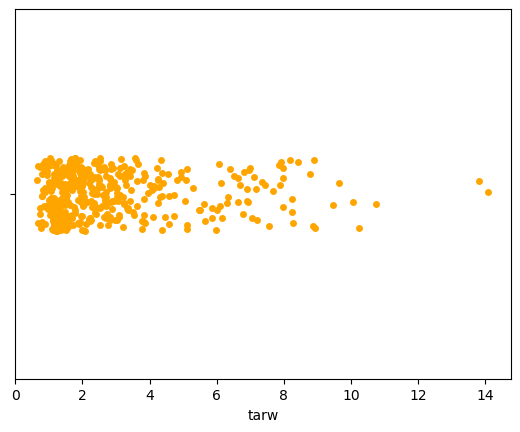

In [13]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.stripplot(x=df[i],color='orange')
        plt.show()

### Violinplot

#### This function is intended to complement other plots by showing the location of individual observations in an unobtrusive way.

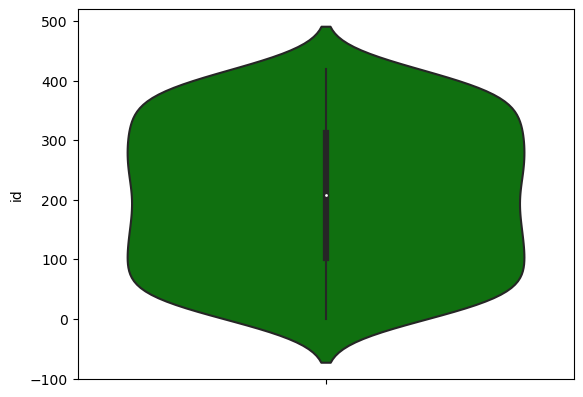

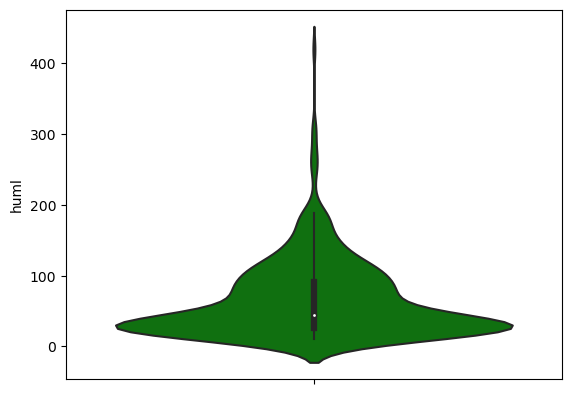

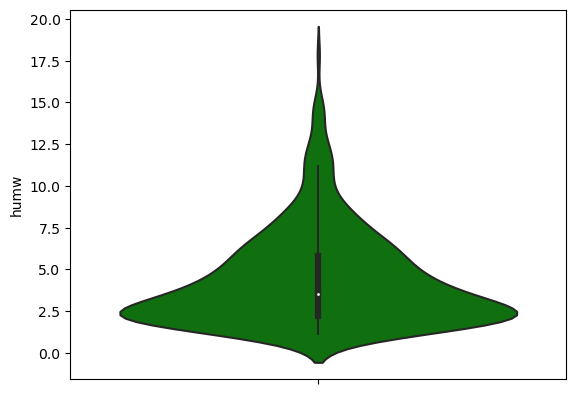

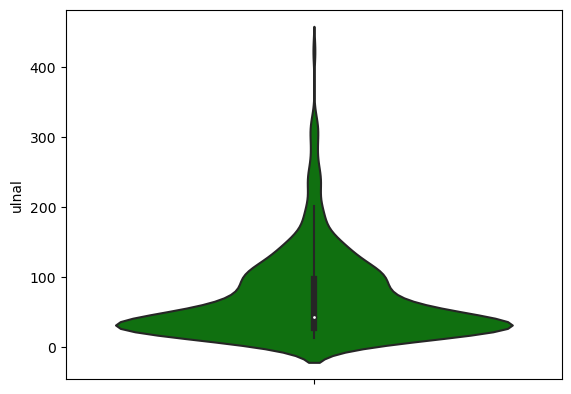

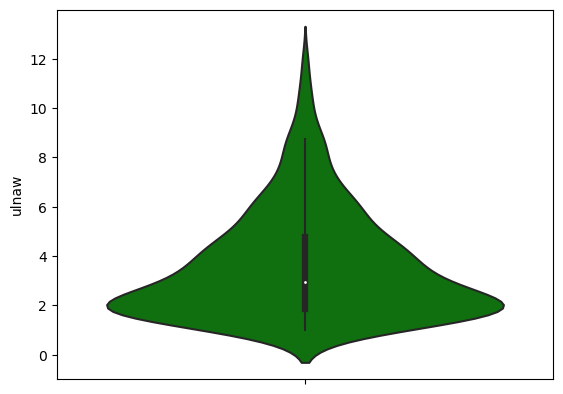

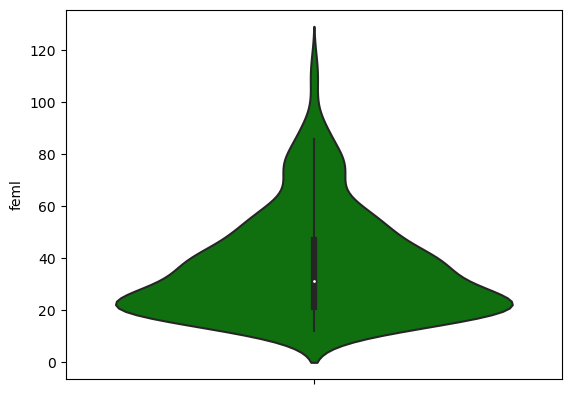

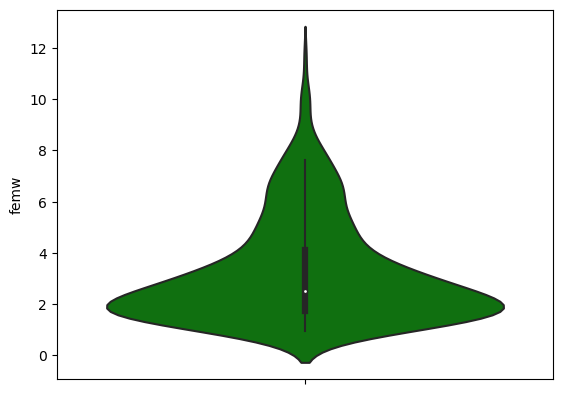

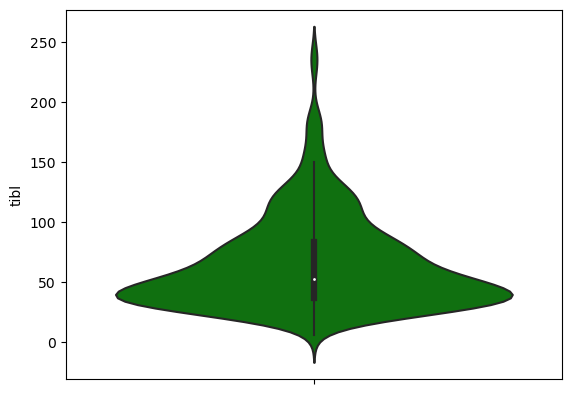

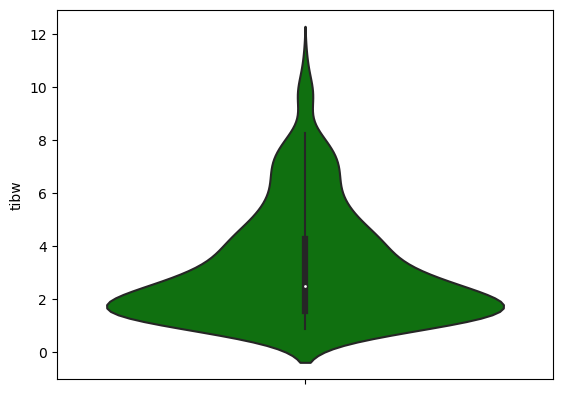

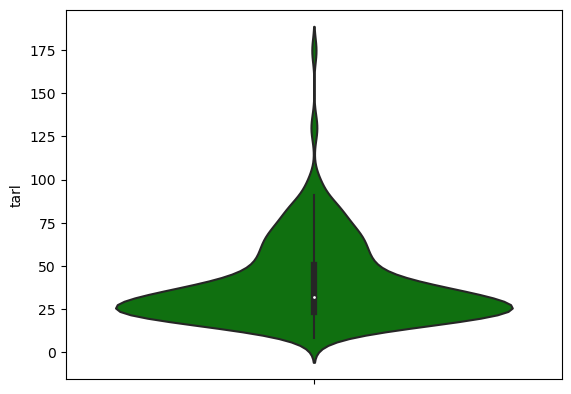

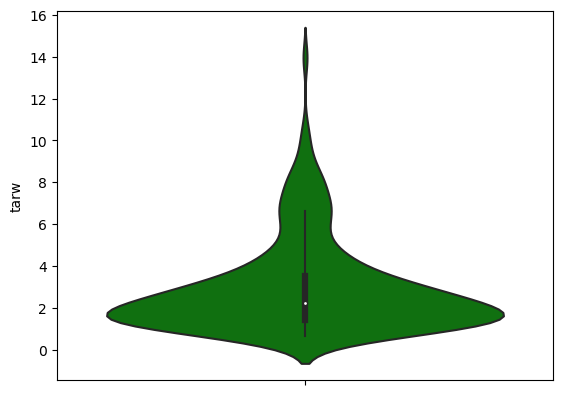

In [15]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.violinplot(y=df[i],color='green')
        plt.show()

### Boxplot

#### A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.

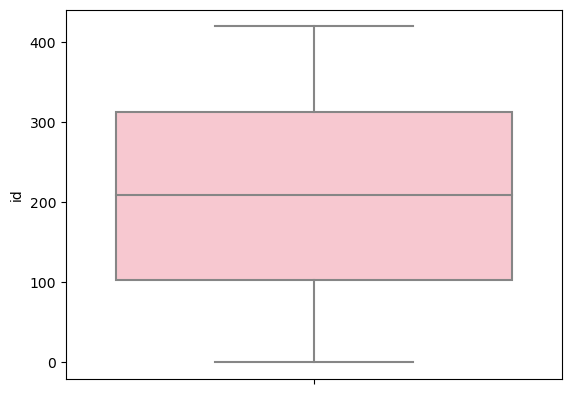

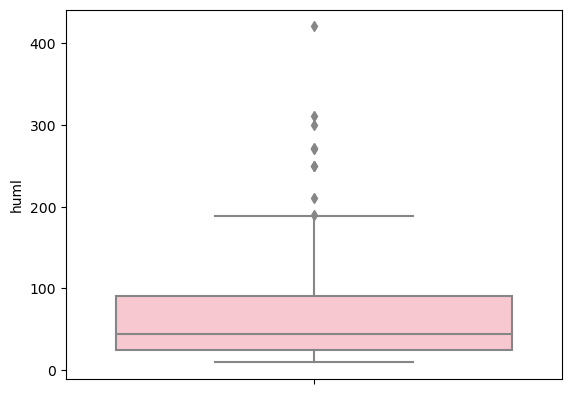

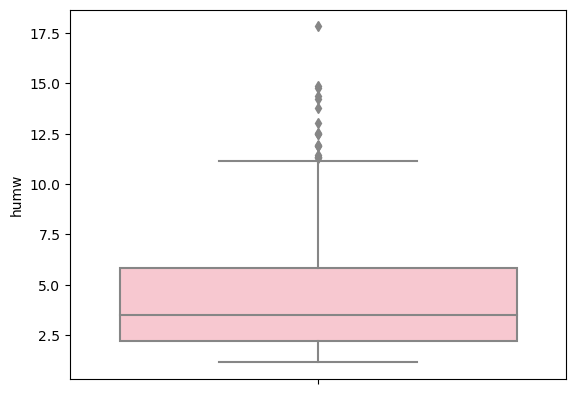

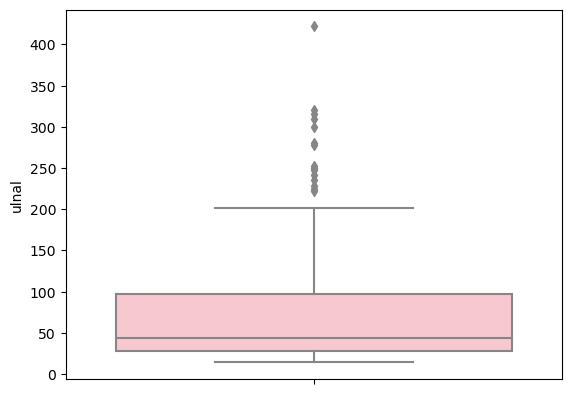

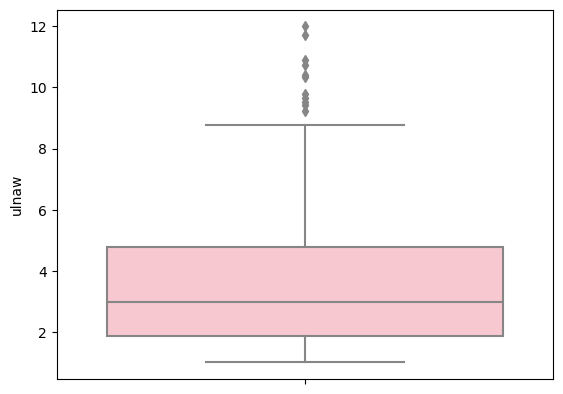

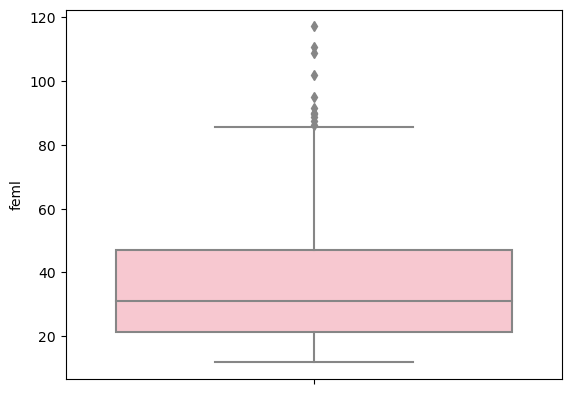

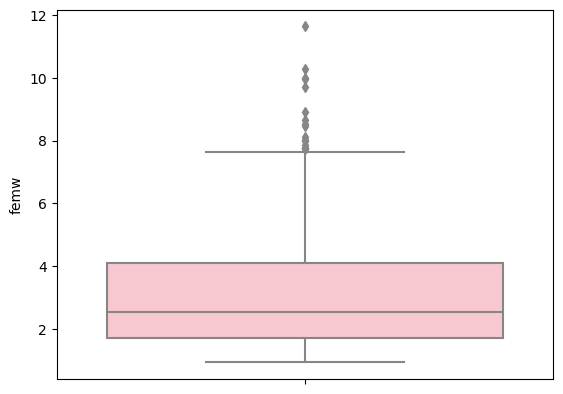

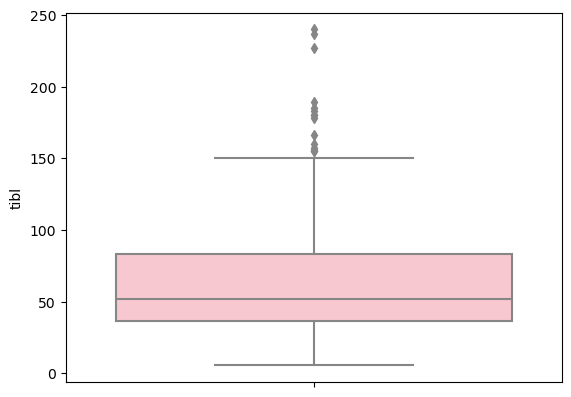

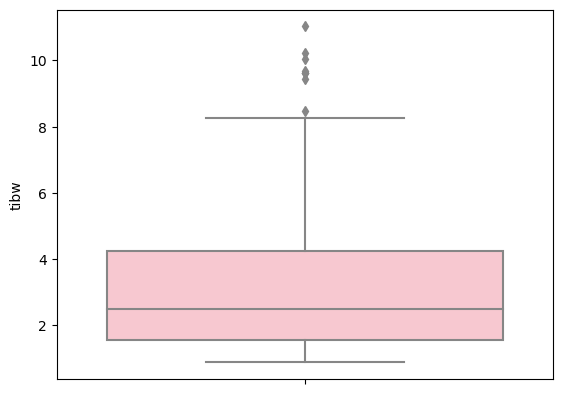

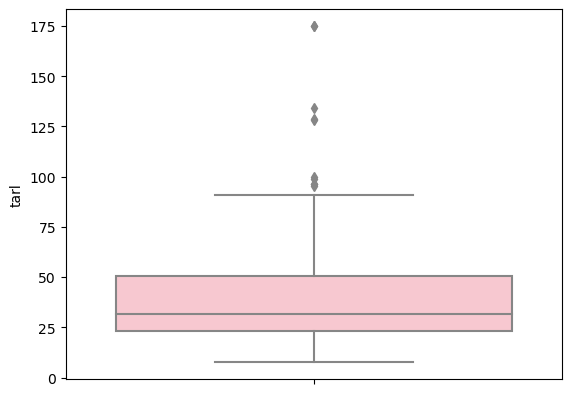

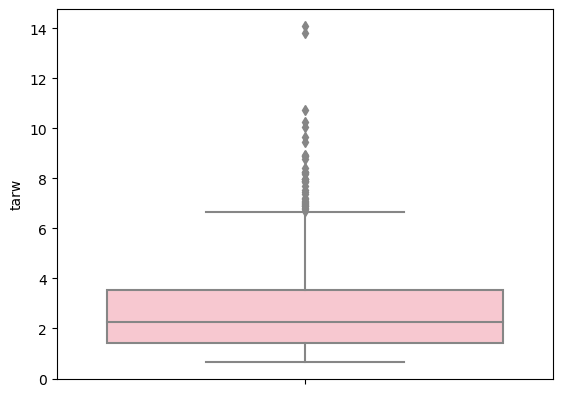

In [17]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.boxplot(y=df[i],color='pink')
        plt.show()

## Multivariate Analysis

### Pairplot

#### This function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

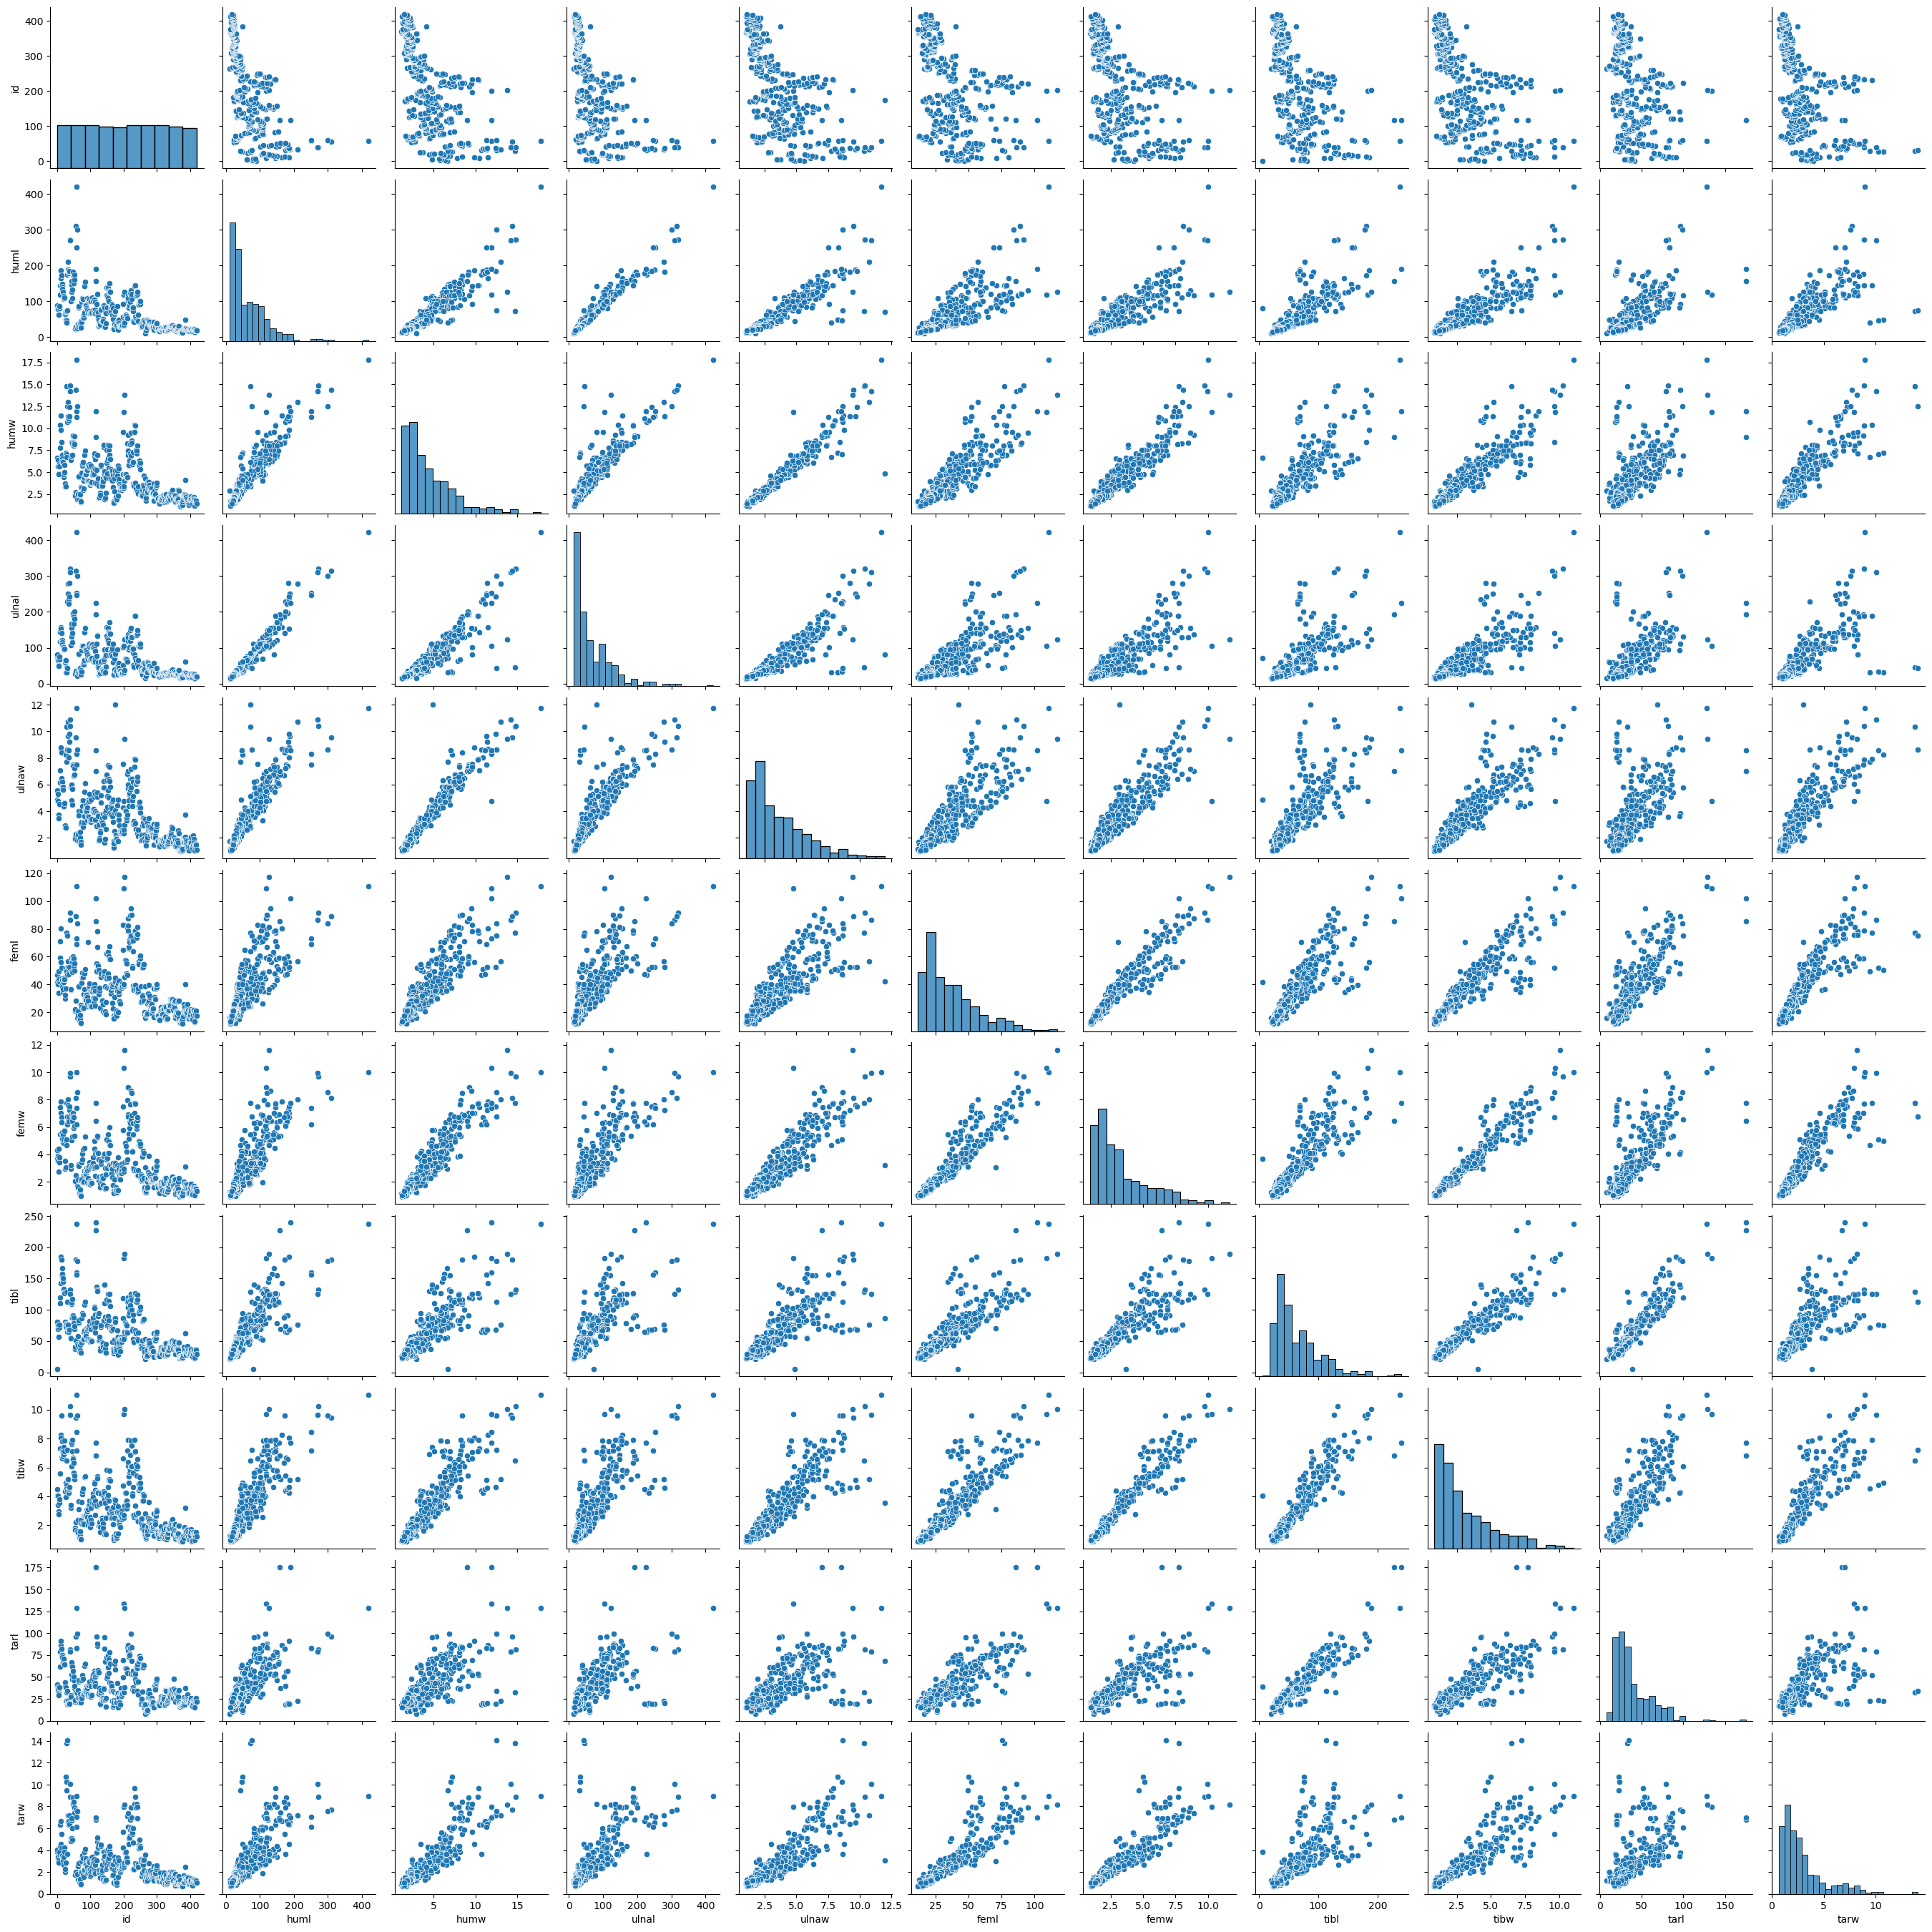

In [18]:
sns.pairplot(df)

### Barplot

#### A bar chart (aka bar graph, column chart) plots numeric values for levels of a categorical feature as bars. Levels are plotted on one chart axis, and values are plotted on the other axis. Each categorical value claims one bar, and the length of each bar corresponds to the bar’s value. Bars are plotted on a common baseline to allow for easy comparison of values.

<Figure size 4000x2000 with 0 Axes>

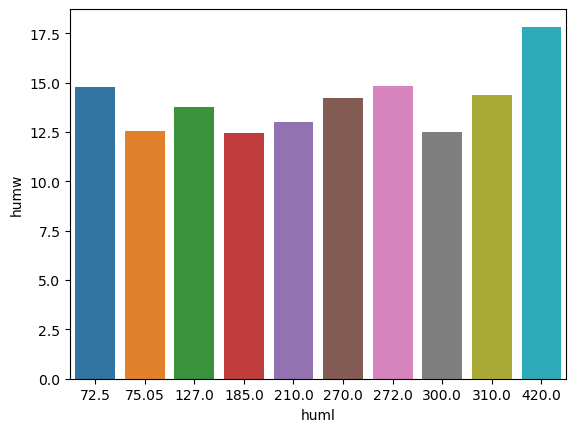

<Figure size 4000x2000 with 0 Axes>

In [19]:
sns.barplot(x='huml',y='humw',data=df.sort_values(by='humw',ascending=False)[:10]);
plt.figure(figsize=(40,20))

### Lineplot

#### A line plot is a way to display data along a number line.Line plots are also called dot plots.¶


<Axes: xlabel='femw', ylabel='feml'>

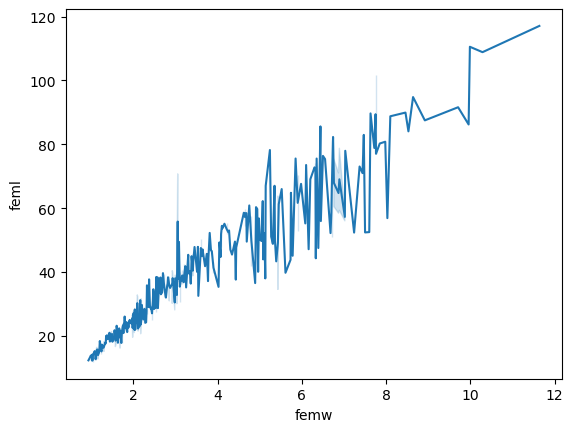

In [20]:
sns.lineplot(y='feml', x='femw', data=df)

### Regplot

#### Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

<Axes: xlabel='ulnaw', ylabel='ulnal'>

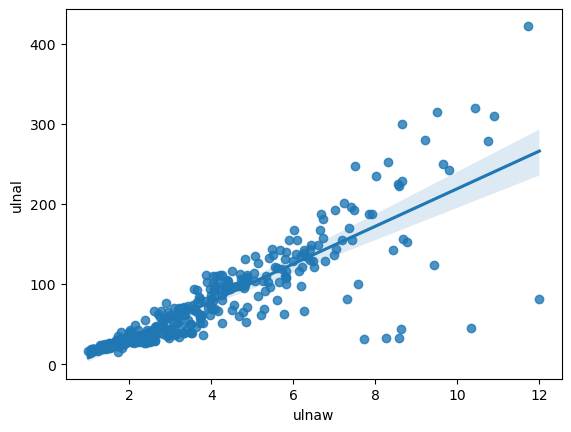

In [22]:
sns.regplot(y=df['ulnal'], x=df['ulnaw'])  

### Heatmap

#### A heatmap (aka heat map) depicts values for a main variable of interest across two axis variables as a grid of colored squares. The axis variables are divided into ranges like a bar chart or histogram, and each cell’s color indicates the value of the main variable in the corresponding cell range.

<Axes: >

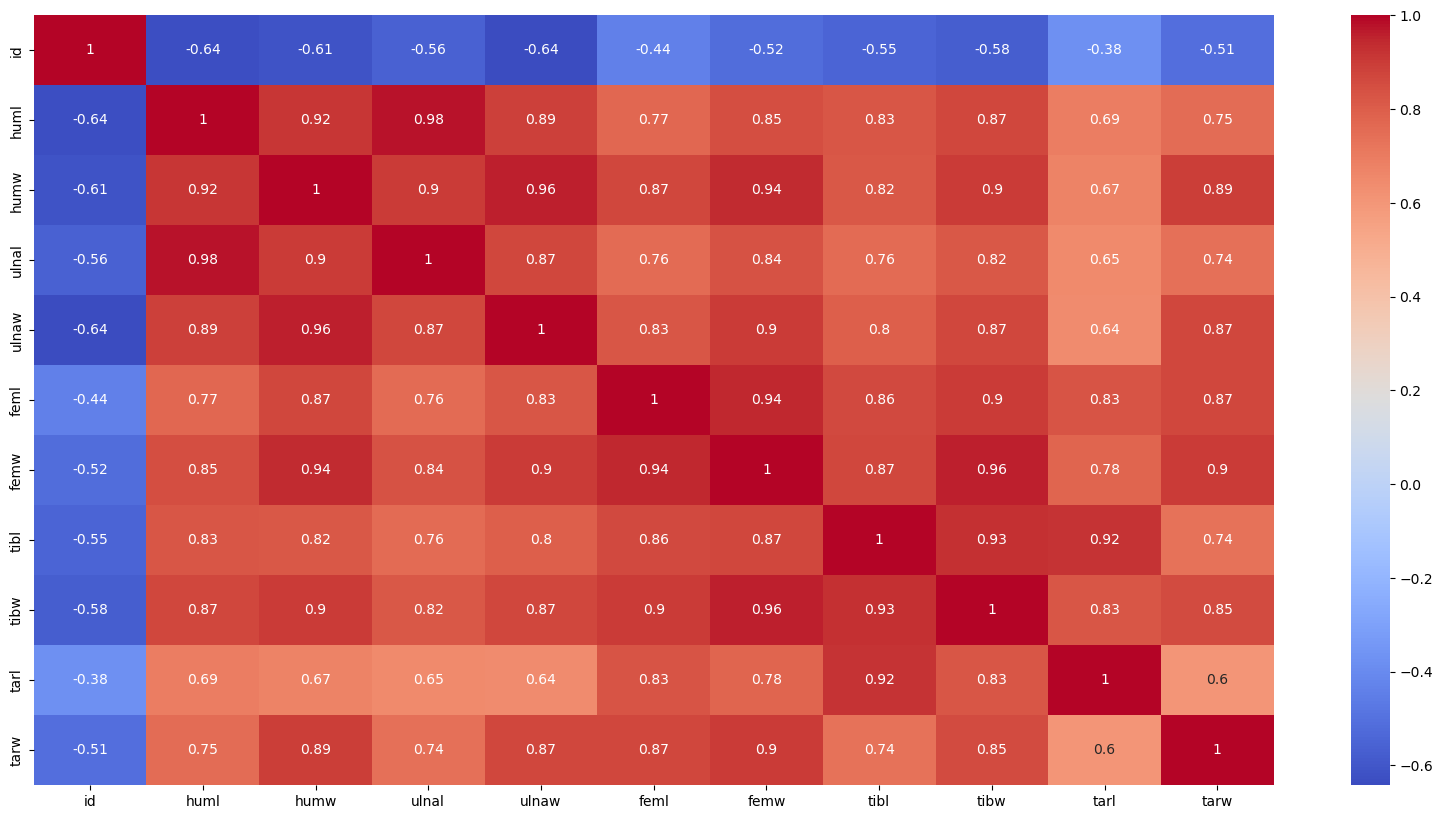

In [23]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

## Label Encoding

#### To convert categorical values into numerical values

In [24]:
l=LabelEncoder()

In [26]:
df['type']=l.fit_transform(df['type'])
df

id   huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw  \
0      0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84   
1      1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01   
2      2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34   
3      3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41   
4      4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13   
..   ...    ...   ...    ...    ...    ...   ...    ...   ...    ...   ...   
415  415  17.96  1.63  19.25   1.33  18.36  1.54  31.25  1.33  21.99  1.15   
416  416  19.21  1.64  20.76   1.49  19.24  1.45  33.21  1.28  23.60  1.15   
417  417  18.79  1.63  19.83   1.53  20.96  1.43  34.45  1.41  22.86  1.21   
418  418  20.38  1.78  22.53   1.50  21.35  1.48  36.09  1.53  25.98  1.24   
419  419  17.89  1.44  19.26   1.10  17.62  1.34  29.81  1.24  21.69  1.05   

     type  
0       3  
1       3  
2       3  
3       3  
4       3  
..    ...  
415     2  
416     2  
417     2  
418     2  
419     2  

[413 rows x 12 columns]

## Selecting X & Y

In [27]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Imbalance Checking

#### Imbalanced-Learn is a Python module that helps in balancing the datasets which are highly skewed or biased towards some classes. Thus, it helps in resampling the classes which are otherwise oversampled or undesampled. If there is a greater imbalance ratio, the output is biased to the class which has a higher number of examples.

<Axes: ylabel='count'>

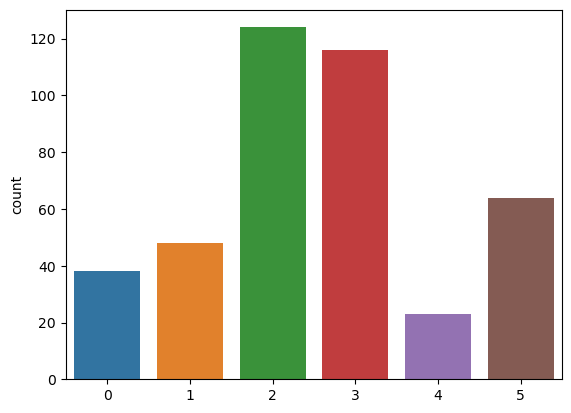

In [28]:
sns.countplot(x=y)

In [29]:
over_sampler = RandomOverSampler()

In [30]:
x, y = over_sampler.fit_resample(x,y)

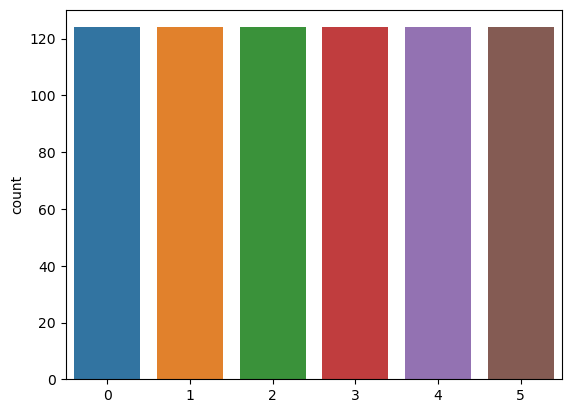

In [31]:
sns.countplot(x=y);

### The target is in balanced form. So we move to next process

## Scaling X

In [32]:
sc = StandardScaler()
x = sc.fit_transform(x)

## Selecting the Model as Randomforest Classifier

In [34]:
model = RandomForestClassifier()

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [36]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with RandomForestClassifier()
Model accuracy on train is::  1.0
Model accuracy on test is::  1.0
confusion_matrix train is::  [[ 98   0   0   0   0   0]
 [  0 101   0   0   0   0]
 [  0   0  96   0   0   0]
 [  0   0   0  99   0   0]
 [  0   0   0   0 102   0]
 [  0   0   0   0   0  99]]
confusion_matrix test is::  [[26  0  0  0  0  0]
 [ 0 23  0  0  0  0]
 [ 0  0 28  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  0 25]]
Wrong Predictions made: 0 / 149
************************************************************


In [37]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)

In [38]:
OUTPUT

ACTUAL  PREDICTION
0         3           3
1         3           3
2         3           3
3         3           3
4         3           3
..      ...         ...
739       5           5
740       5           5
741       5           5
742       5           5
743       5           5

[744 rows x 2 columns]

## Confusion Matrix

#### A confusion matrix, also known as an error matrix, is a powerful tool used to evaluate the performance of classification models. The matrix is a tabular format that shows predicted values against their actual values. A confusion matrix is a table that displays the number of correct and incorrect predictions made by a classification model.

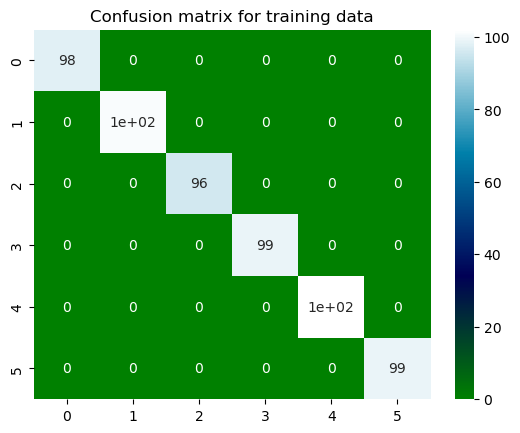

In [39]:
plt.title("Confusion matrix for training data")
sns.heatmap(con_train, annot=True, cmap='ocean');

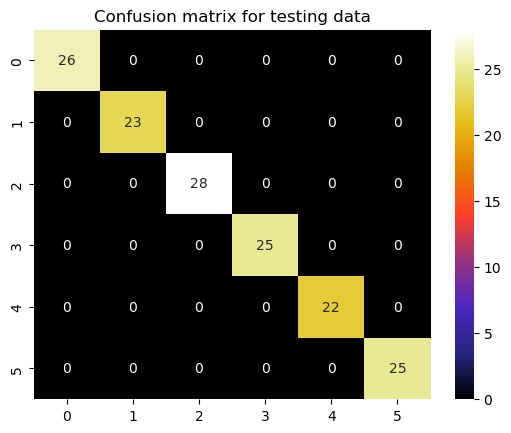

In [40]:
plt.title("Confusion matrix for testing data")
sns.heatmap(con_test, annot=True, cmap='CMRmap');

### Labelizing the Output

In [42]:
y = label_binarize(y, classes=[0,1,2,3,4,5])
n_classes = 6

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

#### For plotting ROC AUC curve for each class, we need to label-binarize the Target y.

## ROC_AUC Curve

#### ROC stands for Receiver Operating Characteristic curve. This is a graph that shows the performance of a machine learning model on a classification problem by plotting the true positive rate and the false positive rate. AUC stands for Area Under the Curve. It is used to measure the entire area under the ROC curve.

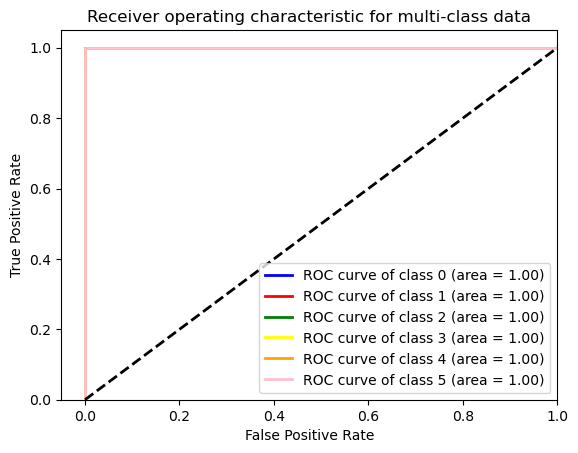

In [44]:
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=0),)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()